In [1]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [2]:
df_text = pd.read_csv('data_lab3_1_questions - sources.csv')
df_text.head()

,id,type,question,topic
0,1,choice,Choose correct statement(s).,statistics
1,2,choice,Consider a map $\varphi \colon L \to M$ where ...,algebra
2,3,code,Write a program that checks whether two given ...,programming
3,4,code,Your program will have an access to foo func...,programming
4,5,code,Given a rectangle array n×m in size. Rotate it...,programming


In [3]:
nltk.download("stopwords")
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Сергей\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


<AxesSubplot:>

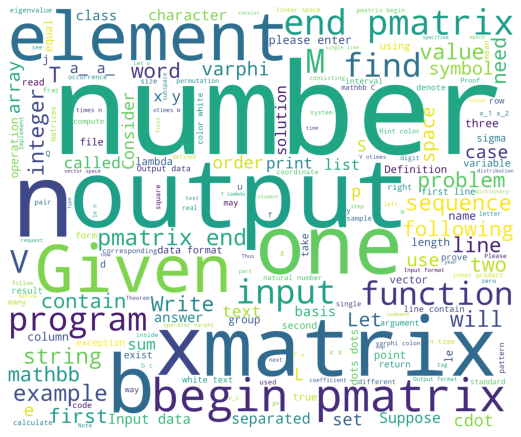

In [4]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
    
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):  
    return WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))

corpus = get_corpus(df_text['question'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [5]:
df_text['question_clean'] = df_text['question'].map(lambda x: x.lower())
df_text['question_clean'] = df_text['question_clean'].map(lambda x: x.split(' '))
df_text['question_clean'] = df_text['question_clean'].map(lambda x: [token for token in x if token not in stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
df_text['question_clean'] = df_text['question_clean'].map(lambda x: ' '.join(x))

In [6]:
df_text.head()

,id,type,question,topic,question_clean
0,1,choice,Choose correct statement(s).,statistics,choose correct statement(s).
1,2,choice,Consider a map $\varphi \colon L \to M$ where ...,algebra,consider map $\varphi \colon l \to m$ $l$ $m$ ...
2,3,code,Write a program that checks whether two given ...,programming,write program checks whether two given words\n...
3,4,code,Your program will have an access to foo func...,programming,"program access foo function, throw exceptions...."
4,5,code,Given a rectangle array n×m in size. Rotate it...,programming,given rectangle array n×m size. rotate 90 degr...


<AxesSubplot:>

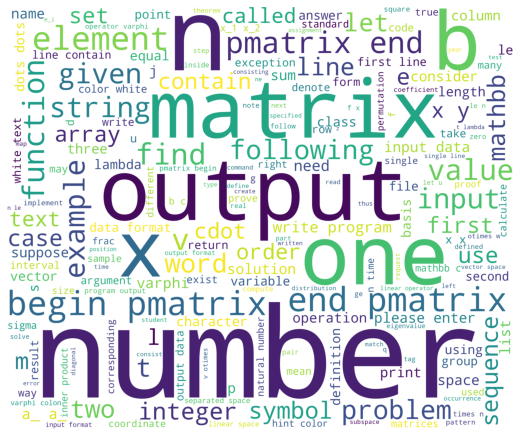

In [7]:
corpus = get_corpus(df_text['question_clean'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(df_text['question_clean'], df_text['topic'], test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
linearClassifer = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])

linearClassifer.fit(X_train, y_train)

predicted_sgd = linearClassifer.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.98      1.00      0.99        44
 programming       1.00      0.98      0.99        58
  statistics       1.00      1.00      1.00        20

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



In [10]:
kNeighbors = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])


kNeighbors.fit(X_train, y_train)

predicted_sgd = kNeighbors.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.96      0.98      0.97        44
 programming       0.98      0.98      0.98        57
  statistics       1.00      0.95      0.98        21

    accuracy                           0.98       122
   macro avg       0.98      0.97      0.97       122
weighted avg       0.98      0.98      0.98       122



In [11]:
forest = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', RandomForestClassifier(n_estimators=10))])

forest.fit(X_train, y_train)

predicted_sgd = forest.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.84      0.95      0.89        40
 programming       0.96      0.95      0.96        58
  statistics       0.90      0.75      0.82        24

    accuracy                           0.91       122
   macro avg       0.90      0.88      0.89       122
weighted avg       0.91      0.91      0.91       122



In [12]:
#Стекинг
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]

stacking = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', StackingClassifier(estimators=estimators, final_estimator=SVC()))])

stacking.fit(X_train, y_train)

predicted_sgd = stacking.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.98      1.00      0.99        44
 programming       1.00      1.00      1.00        57
  statistics       1.00      0.95      0.98        21

    accuracy                           0.99       122
   macro avg       0.99      0.98      0.99       122
weighted avg       0.99      0.99      0.99       122



In [13]:
#Бэггинг
bagging = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=12))])

bagging.fit(X_train, y_train)

predicted_sgd = bagging.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.96      1.00      0.98        43
 programming       1.00      0.92      0.96        62
  statistics       0.85      1.00      0.92        17

    accuracy                           0.96       122
   macro avg       0.94      0.97      0.95       122
weighted avg       0.96      0.96      0.96       122



In [14]:
#Бэггинг
bagging = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=10), n_estimators=50, random_state=12))])

bagging.fit(X_train, y_train)

predicted_sgd = bagging.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.93      0.98      0.95        43
 programming       0.98      0.97      0.97        58
  statistics       0.90      0.86      0.88        21

    accuracy                           0.95       122
   macro avg       0.94      0.93      0.94       122
weighted avg       0.95      0.95      0.95       122



In [15]:
#Бэггинг
bagging = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', BaggingClassifier(base_estimator=SGDClassifier(), n_estimators=50, random_state=12))])

bagging.fit(X_train, y_train)

predicted_sgd = bagging.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

     algebra       0.98      1.00      0.99        44
 programming       1.00      0.98      0.99        58
  statistics       1.00      1.00      1.00        20

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122

